In [ ]:
## VICTOR ALVAREZ PROVENCIO
## ENTREGA TAREA 2 ABID - NOTEBOOK ML1
## 11-03-2021


from sklearn.datasets import load_digits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import numpy as np



In [ ]:
## Cargamos el dataset 
digits = load_digits()

In [ ]:
# 1.- Lo primero es inspeccionar la matriz

print("\n")
print("The names of the features")
print(digits.target_names)
print("\n")
print("Tendra estas targets:")
print(digits.data.shape[0])
print("\n")
print("Tendra estas columnas:")
print(digits.data.shape[1])





The names of the features
[0 1 2 3 4 5 6 7 8 9]


Tendra estas targets:
1797


Tendra estas columnas:
64


In [ ]:
## Para ver el numero de targets y el numero de columnas.
digits.data.shape

(1797, 64)

In [ ]:
## Si queremos pintar la matriz con cada una de las imagenes
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

<Figure size 432x288 with 0 Axes>

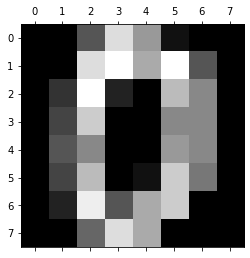

In [ ]:
## 2. - VISUALIZACION
#Para pintar cada imagen por separado
plt.gray()
plt.matshow(digits.images[0])
plt.show()

## Habría muchas formas de visualizar pero no tengo muy claro cómo hacerlo para todas las posiciones. Dejo el ejemplo para digits.images[0]


In [ ]:
# Visualización en tabla segun ejemplo del Notebook
# En este caso se puede ver otra forma de visualización que es verlo como tabla.
digits_df = DataFrame(digits.data)
digits_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
## 3. - Preprocessing

# Para separar los datos de test y los de training. Se utilizarán para entrenar al modelo y para probar que funcione.
# Es fundamental para poder entrenar el modelo


x, y = digits.data, digits.target
x_train, x_test, y_train,y_test = train_test_split(x, y , test_size =0.5, random_state=33)


In [ ]:
# Ejemplo: Matriz de test
print("Matriz de test:")
y

Matriz de test:


array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
## Son distintos como se puede ver
x_train
x_test

array([[ 0.        , -0.30564252, -0.21045165, ...,  0.72640668,
        -0.5024915 , -0.18712854],
       [ 0.        , -0.30564252, -0.42545231, ...,  1.56399424,
         1.93794855, -0.18712854],
       [ 0.        , -0.30564252,  0.43455033, ..., -1.11628597,
        -0.5024915 , -0.18712854],
       ...,
       [ 0.        , -0.30564252,  0.64955099, ..., -1.11628597,
        -0.5024915 , -0.18712854],
       [ 0.        , -0.30564252,  1.29455297, ..., -0.78125094,
        -0.5024915 , -0.18712854],
       [ 0.        ,  3.06895158,  2.1545556 , ...,  0.22385414,
         0.22964052, -0.18712854]])

In [ ]:

# Standardize the features
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Se ha entrenado el objeto scaler con la gaussiana y mira la distribucion de los valores en las columnas y normaliza las tablas. Mejor para entrenar modelos.
x_train
x_test


array([[ 0.        , -0.30564252, -0.21045165, ...,  0.72640668,
        -0.5024915 , -0.18712854],
       [ 0.        , -0.30564252, -0.42545231, ...,  1.56399424,
         1.93794855, -0.18712854],
       [ 0.        , -0.30564252,  0.43455033, ..., -1.11628597,
        -0.5024915 , -0.18712854],
       ...,
       [ 0.        , -0.30564252,  0.64955099, ..., -1.11628597,
        -0.5024915 , -0.18712854],
       [ 0.        , -0.30564252,  1.29455297, ..., -0.78125094,
        -0.5024915 , -0.18712854],
       [ 0.        ,  3.06895158,  2.1545556 , ...,  0.22385414,
         0.22964052, -0.18712854]])

In [ ]:
# Create kNN model
model = KNeighborsClassifier(n_neighbors=15)
# Los vecinos sirven para crear el modelo. Hacen funciones para entrenar datos. Con esto entrenas al modelo con los datos anteriores de train.
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
## Para ver lo que predice y lo que espera de los datos de entrenamiento
print("Prediction", model.predict(x_train))
print("Expected", y_train)


Prediction [4 3 5 3 0 5 9 4 0 9 9 2 7 4 1 4 7 5 8 9 1 0 6 5 0 0 4 2 7 1 5 9 9 3 1 4 6
 0 5 7 2 3 0 6 2 1 7 7 2 9 1 8 6 1 7 7 6 1 5 0 9 9 6 4 6 1 4 4 7 7 5 4 0 5
 1 4 7 4 9 0 1 4 1 4 2 4 0 9 3 4 7 5 9 2 6 9 2 5 4 7 0 3 5 8 1 7 8 9 7 6 6
 1 1 6 0 1 9 8 6 7 1 1 3 7 3 5 0 2 5 5 4 5 5 6 8 8 1 0 7 9 2 4 2 2 7 0 7 6
 0 1 9 2 6 0 5 9 8 3 5 2 7 5 5 8 1 2 6 8 8 5 6 9 9 8 9 6 2 2 9 2 4 0 1 3 0
 1 9 4 0 0 0 7 3 2 3 3 5 6 0 7 5 0 5 5 1 6 9 6 5 8 8 0 1 2 9 5 7 4 9 1 7 3
 6 1 8 0 2 0 7 0 0 3 1 6 3 7 7 3 1 0 2 7 5 5 9 6 8 0 8 6 8 0 3 7 7 2 0 4 6
 2 0 5 7 8 1 5 3 8 6 2 9 6 8 1 1 4 7 6 3 2 8 7 3 2 9 7 6 3 2 0 0 7 4 8 5 8
 8 2 1 8 4 3 6 9 0 5 9 2 8 4 1 2 1 3 7 0 2 7 3 0 5 4 9 4 7 9 1 1 6 1 4 4 7
 1 4 6 9 6 0 6 4 9 0 6 6 1 1 7 1 1 6 5 4 8 8 4 1 6 6 0 3 4 7 1 9 6 5 0 0 0
 7 8 4 3 8 1 9 2 4 1 2 7 0 4 4 8 6 4 4 8 4 6 3 0 2 6 2 5 8 0 2 0 0 9 7 5 7
 1 8 0 3 3 0 1 5 2 6 1 2 9 8 3 9 3 7 8 3 0 7 5 4 1 9 0 0 8 6 9 8 6 9 8 2 5
 8 6 0 4 8 5 5 3 1 1 2 9 7 9 5 7 9 6 9 3 8 4 4 2 7 0 1 5 0 2 0 0 6 7 0 5 7
 3 9 5 1 1 6 1

In [ ]:

# 4. - Evaluación de eficacia
# Para ver la eficacia del modelo de entrenamiento con Accuracy. [Evaluate Accuracy in training]

y_train_pred = model.predict(x_train)
print("Accuracy in training", metrics.accuracy_score(y_train, y_train_pred))



Accuracy in training 0.9732739420935412


In [ ]:

# Lo mismo para ver la eficacia del modelo de test con Accuracy


y_test_pred = model.predict(x_test)
print("Accuracy in testing ", metrics.accuracy_score(y_test, y_test_pred))



Accuracy in testing  0.9510567296996663


In [ ]:
# Con esto ves la matriz de confusion para saber donde se equivoca y cual es el que mas equivoca
print(metrics.confusion_matrix(y_test, y_test_pred))

[[77  0  0  0  0  0  0  0  0  0]
 [ 0 94  0  0  0  0  0  0  1  0]
 [ 0  1 82  0  0  0  0  1  3  0]
 [ 0  0  0 97  0  2  0  2  2  2]
 [ 0  0  0  0 80  0  0  1  3  0]
 [ 0  0  0  0  0 91  1  0  0  3]
 [ 1  0  0  0  0  0 93  0  0  0]
 [ 0  0  0  0  0  0  0 84  0  0]
 [ 0  4  0  4  0  0  0  0 84  0]
 [ 0  1  0  1  0  2  0  2  7 73]]


In [ ]:

# KFold lo que hace es ir entrenando "a trozos" de todos los datos y se va viendo la progresion que va teniendo. Si es muy distinto es que esta entendiendo mal los datos

model = Pipeline([
        ('scaler', StandardScaler()),
        ('kNN', KNeighborsClassifier())
])

# create a k-fold cross validation iterator of k=10 folds
cv = KFold(10, shuffle=True, random_state=33)

# by default the score used is the one returned by score method of the estimator (accuracy)
scores = cross_val_score(model, x_train, y_train, cv=cv)
print(scores)


[0.92222222 0.95555556 0.97777778 0.95555556 0.95555556 0.95555556
 0.93333333 0.96666667 0.95505618 0.97752809]


In [ ]:
## Aqui se ve que el modelo esta bien entrenado porque los valores son muy similares

Text(0, 0.5, 'Accuracy')

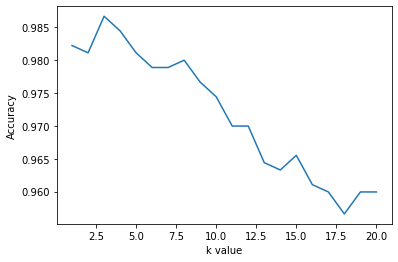

In [ ]:
# Ahora hay que tunear el modelo para llegar lo mas alto posible
k_range = range(1, 21)
accuracy = []
for k in k_range:
    m = KNeighborsClassifier(k)
    m.fit(x_train, y_train)
    y_test_pred = m.predict(x_test)
    accuracy.append(metrics.accuracy_score(y_test, y_test_pred))
plt.plot(k_range, accuracy)
plt.xlabel('k value')
plt.ylabel('Accuracy')

In [ ]:

param_grid = {'max_depth': np.arange(3, 10)} 

gs = GridSearchCV(DecisionTreeClassifier(), param_grid)

gs.fit(x_train, y_train)

# summarize the results of the grid search
print("Best score: ", gs.best_score_)
print("Best params: ", gs.best_params_)

Best score:  0.8028739913097453
Best params:  {'max_depth': 9}


In [ ]:
## GRID SEARCH
# Hace unos determinados calculos y como resultado devuelve una tabla que sirve al desarrollador para ver donde está fallando mas 
# set of parameters to test
tuned_parameters = [{'max_depth': np.arange(3, 10),
#                     'max_weights': [1, 10, 100, 1000]},
                     'criterion': ['gini', 'entropy'], 
                     'splitter': ['best', 'random'],
                    # 'min_samples_leaf': [2, 5, 10],
                     'class_weight':['balanced', None],
                     'max_leaf_nodes': [None, 5, 10, 20]
                    }]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    # cv = the fold of the cross-validation cv, defaulted to 5
    gs = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, cv=10, scoring='%s_weighted' % score)
    gs.fit(x_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(gs.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']

    for mean_score, std_score, params in zip(means, stds, gs.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r" % (mean_score, std_score * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, gs.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

Best parameters set found on development set:

{'class_weight': None, 'criterion': 'entropy', 'max_depth': 8, 'max_leaf_nodes': None, 'splitter': 'random'}

Grid scores on development set:

0.418 (+/-0.073) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': None, 'splitter': 'best'}
0.444 (+/-0.112) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': None, 'splitter': 'random'}
0.302 (+/-0.040) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'splitter': 'best'}
0.284 (+/-0.108) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'splitter': 'random'}
0.418 (+/-0.073) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 10, 'splitter': 'best'}
0.442 (+/-0.077) for {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 10, 'splitter': 'random'}
0.417 (+/-0.074) for {'class

In [ ]:
 ## En conclusión, este Notebook sirve para introducir a quien lo hace al mundo del ML y a entender unos determinados conceptos muy importantes para el aprendizaje automático. 
## El único problema que veo, a nivel personal y basándome en mi experiencia, es que al no haber estudiado previamente he tenido que ir aprendiendo los conceptos sobre la marcha. La gracia es tener los conceptos
## interiorizados previamente al desarrollo del Notebook para poder asentarlos.  